In [1]:
import sklearn
import numpy as np 
from PIL import Image, ImageFilter
import os

# Fix depth segmentation output (convert to mask image)

In [9]:
depth_segmentation_dir = "/home/abian/Workspace/Thesis/Segmentation/PointCloudSegmentation/Build/Release/result"
save_dir = "/home/abian/Workspace/Thesis/Segmentation/DataTest/Segmentation/Depth/"

In [10]:
for subject in os.listdir(depth_segmentation_dir):
    subject_dir = os.path.join(depth_segmentation_dir, subject)
    subject_save_dir = os.path.join(save_dir, subject)
    if not os.path.exists(subject_save_dir):
        os.mkdir(subject_save_dir)

    for filename in os.listdir(subject_dir):
        current_image_dir = os.path.join(subject_dir, filename)
        img_np = np.array(Image.open(current_image_dir))
        img_np[img_np>0] = 255
        img = Image.fromarray(np.uint8(img_np)).convert('L')
        img.save(os.path.join(subject_save_dir, filename))

# Morphologic operation in Depth Mask

In [11]:
depth_dir = save_dir

In [16]:
from matplotlib import pyplot as plt

for subject in os.listdir(depth_dir):
    subject_dir = os.path.join(depth_dir, subject)
    for filename in os.listdir(subject_dir):
        img = Image.open(os.path.join(subject_dir, filename))
        n_dilation = 5
        n_erosion = n_dilation
        for idx in range(n_dilation):
            img = img.filter(ImageFilter.MaxFilter(3))
        for idx in range(n_erosion):
            img = img.filter(ImageFilter.MinFilter(3))

        img.save(os.path.join(subject_dir, filename))
        # plt.imshow(img)
        # plt.show()

# Masks

In [17]:
masks_dir = "/home/abian/Workspace/Thesis/Segmentation/DataTest/Masks_Average_STAPLE/"
masks = os.listdir("/home/abian/Workspace/Thesis/Segmentation/DataTest/Masks_Average_STAPLE/")

In [18]:
# Esta función es para unificar las máscaras que vienen separadas por pie
def unifyImage(img1: Image, img2: Image) -> Image:
    np_img1 = np.array(img1)
    np_img2 = np.array(img2)
    np_result = np.zeros(np_img1.shape, dtype=np.uint8)

    np_result[np_img1>0] = 255
    np_result[np_img2>0] = 255
    return Image.fromarray(np_result)

jaccard: 0.9228345844191203
DICE Score: 0.9598689267365185


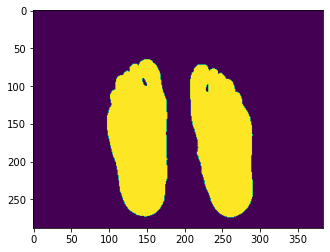

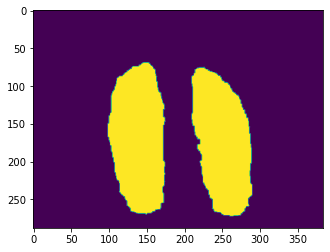

ADM001_Depth_T5.png
jaccard: 0.8036124292055717
DICE Score: 0.891114317236697


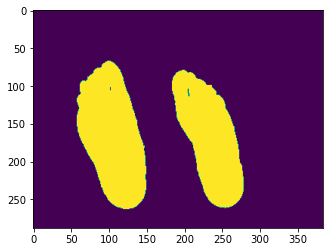

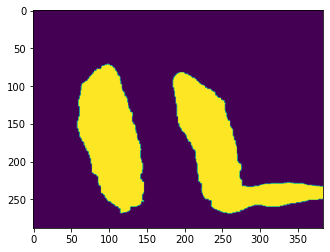

In [48]:
import re
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import dice
import pandas as pd

subjects = sorted(os.listdir(depth_dir))

# Create Dataframes 
index = sorted(os.listdir(depth_dir))
columns = ['T0','T5']

jaccard_df = pd.DataFrame(index=index, columns=columns)
jaccard_df = jaccard_df.fillna(0) # with 0s rather than NaNs

dice_df = pd.DataFrame(index=index, columns=columns)
dice_df = dice_df.fillna(0) 
# -------------------

for subject in subjects:
    regex_pattern = "({})(.*)([L|R]_T[0-9]+.png)".format(subject)
    r = re.compile(regex_pattern)
    subject_masks = list(filter(r.match, masks))
    
    subject_dir = os.path.join(depth_dir, subject)
    for filename in sorted(os.listdir(subject_dir)):
        dataframe_column_idx = 'T0'
        if "_T5" in filename:
            dataframe_idx = 'T5'

        regex_pattern = "(.*)({})".format(filename[filename.index("_T"):])
        r = re.compile(regex_pattern)
        current_mask_files = list(filter(r.match, subject_masks))
        current_mask = list(map(lambda x: Image.open(os.path.join(masks_dir, x)), current_mask_files))
        
        # Obtenemos la imagen con los dos pies en la misma imagen
        mask = unifyImage(*current_mask).convert('L')
        segmentation_result = Image.open(os.path.join(subject_dir, filename))
        segmentation_result = segmentation_result.resize(mask.size)

        np_mask = np.array(mask, dtype=np.uint) / 255
        np_segmentation_result = np.array(segmentation_result, dtype=np.uint) / 255
        np_segmentation_result[np_segmentation_result>0] = 1


        jaccard_result = jaccard_score(np_mask.flatten(), np_segmentation_result.flatten())
        dice_result = dice(np_mask.flatten(), np_segmentation_result.flatten())
        jaccard_df[dataframe_column_idx][subject] = jaccard_result
        dice_df[dataframe_column_idx][subject] = dice_result
        print("jaccard: {}".format(jaccard_result))
        print("DICE Score: {}".format(1 - dice_result))
        plt.imshow(mask)
        plt.show()
        plt.imshow(segmentation_result)
        plt.show()

    break



In [21]:
import pandas as pd

In [ ]:
df = pd.DataFrame({'A': 1.,
                   'B': pd.Timestamp('20130102'),
                   'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                   'D': np.array([3] * 4, dtype='int32'),
                   'E': pd.Categorical(["test", "train", "test", "train"]),
                   'F': 'foo'})

In [41]:
import datetime
import pandas as pd
import numpy as np

todays_date = datetime.datetime.now().date()
# index = pd.date_range(todays_date-datetime.timedelta(10), periods=10, freq='D')
index = sorted(os.listdir(depth_dir))

columns = ['T0','T5']

df_ = pd.DataFrame(index=index, columns=columns)
df_ = df_.fillna(0) # with 0s rather than NaNs

In [47]:
df_['T5']

ADM001    0
ADM002    0
ADM003    0
CTA001    0
CTA002    0
CTA003    0
ESP001    0
ESP002    0
ESP003    0
ESP004    0
ESP005    0
ESP006    0
ESP007    0
ESP008    0
EST001    0
EST002    0
EST003    0
MED001    0
MED002    0
MED003    0
MED004    0
MED005    0
NRT001    0
NRT002    0
NRT003    0
Name: T5, dtype: int64